#                           Assignment 1: Linear Regression                                                #

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

# 1.	Data Preprocessing:
•	Load the dataset and print a sample number of rows.
•	Find the number of rows with any missing values. Remove any row with a missing value.
•	Convert 'Gender', 'Smoker', and 'Region' into numerical values suitable for regression analysis (e.g., using one-hot encoding for 'region' and binary encoding for 'sex' and 'smoker').
•	Normalize the features using Min-Max scaling.


In [2]:
#Loading dataset into a dataframe

df = pd.read_csv('insurance.csv')

In [3]:
#Printing first 10 rows of the dataset

df.head(10)

,Age,Gender,BMI,Children,Smoker,Region,Expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,NaN,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [4]:
# Checking for missing values 
# Get the count of rows with at least one missing value

missing_values = df[df.isna().any(axis=1)]

missing_count = len(missing_values)

total_len = len(df)

print((missing_count/total_len)*100)



1.2705530642750373


In [5]:
#As the percentage of missing values is less i.e 1.27% of total data, handling the missing values by dropping the rows 

#Shape of dataframe before handling missing values:

print('Shape of dataframe before handling missing values is: ',df.shape)

# Dropping rows with atleast one null values

df.dropna(inplace=True)

print('Shape of dataframe after handling missing values is: ',df.shape)


Shape of dataframe before handling missing values is:  (1338, 7)
Shape of dataframe after handling missing values is:  (1321, 7)


In [6]:
# Binary encoding for Gender and Smoker
df['Gender'] = df['Gender'].map({'male': 0, 'female': 1})
df['Smoker'] = df['Smoker'].map({'no': 0, 'yes': 1})

# One-hot encoding for Region
df = pd.get_dummies(df, columns=['Region'],drop_first=True)

print(df)

      Age  Gender   BMI  Children  Smoker  Expenses  Region_northwest  \
0      19       1  27.9         0       1  16884.92             False   
1      18       0  33.8         1       0   1725.55             False   
2      28       0  33.0         3       0   4449.46             False   
3      33       0  22.7         0       0  21984.47              True   
4      32       0  28.9         0       0   3866.86              True   
...   ...     ...   ...       ...     ...       ...               ...   
1331   23       1  33.4         0       0  10795.94             False   
1332   52       1  44.7         3       0  11411.69             False   
1333   50       0  31.0         3       0  10600.55              True   
1336   21       1  25.8         0       0   2007.95             False   
1337   61       1  29.1         0       1  29141.36              True   

      Region_southeast  Region_southwest  
0                False              True  
1                 True             Fa

In [7]:
#Normalizing the features using Min-Max scaling

scaler = MinMaxScaler()
df[['Age', 'BMI', 'Children']] = scaler.fit_transform(df[['Age', 'BMI', 'Children']])

print(df)

           Age  Gender       BMI  Children  Smoker  Expenses  \
0     0.021739       1  0.320755  0.481481       1  16884.92   
1     0.000000       0  0.479784  0.488889       0   1725.55   
2     0.217391       0  0.458221  0.503704       0   4449.46   
3     0.326087       0  0.180593  0.481481       0  21984.47   
4     0.304348       0  0.347709  0.481481       0   3866.86   
...        ...     ...       ...       ...     ...       ...   
1331  0.108696       1  0.469003  0.481481       0  10795.94   
1332  0.739130       1  0.773585  0.503704       0  11411.69   
1333  0.695652       0  0.404313  0.503704       0  10600.55   
1336  0.065217       1  0.264151  0.481481       0   2007.95   
1337  0.934783       1  0.353100  0.481481       1  29141.36   

      Region_northwest  Region_southeast  Region_southwest  
0                False             False              True  
1                False              True             False  
2                False              True        

# 2.	Splitting the Data:
•	Divide the data into “features” and “target” subsets.
•	Split the data into training and testing subsets (commonly a 70/30, 75/25, or 80/20 split).


In [8]:
# Splitting the dataframe into features and target value

X = df.drop('Expenses', axis=1)  # Dropping the target column to get features
y = df['Expenses'] 

print("Shape of features: ",X.shape)
print("Shape of target value: ",y.shape)



Shape of features:  (1321, 8)
Shape of target value:  (1321,)


In [9]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Printing shapes of train and test sets 

print("Shape of X_train is: ",X_train.shape)
print("Shape of X_test is: ",X_test.shape)
print("Shape of y_train is: ",y_train.shape)
print("Shape of y_test is: ",y_test.shape)


# Convert y_train and y_test to NumPy arrays
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

# Reshaping the y_train and y_test to vectors and printing the shape

print("Shape of y_train is: ",y_train.shape)
print("Shape of y_test is: ",y_test.shape)


Shape of X_train is:  (1056, 8)
Shape of X_test is:  (265, 8)
Shape of y_train is:  (1056,)
Shape of y_test is:  (265,)
Shape of y_train is:  (1056, 1)
Shape of y_test is:  (265, 1)


# 3.	Gradient Descent Implementation:
•	Implement the gradient descent algorithm (without the Scikit-Learn library) to find the regression line. Initialize parameters randomly and update them iteratively to minimize the loss function. Record the loss value for each iteration:

•	Show the coefficients and intercept of the model.
•	Modify the code to implement the exponential decay method for the learning rate.
•	Plot the loss values as a function of the number of iterations for the constant and decaying learning rates.



In [10]:
#Implement the gradient descent algorithm (without the Scikit-Learn library) to find the regression line. Initialize parameters randomly and update them iteratively to minimize the loss function. Record the loss value for each iteration:

#Implementation of gradient_decent method without library to find regression line

def gradient_decent(X_b,W,n_iterations,alpha):
    start_time = time.time()
    loss = []                          # Loss value for each iteratio
    for iteration in range(n_iterations):
        gradients = 1/m * X_b.T.dot(X_b.dot(W) - y_train)
        W = W - alpha * gradients
        predictions = X_b.dot(W)
        loss.append(mean_squared_error(y_train, predictions))
    
    end_time = time.time()
    computation_time = end_time - start_time
    
    return W,loss,computation_time


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Model 1

X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
m = X_train.shape[0]  # number of data points
n = X_train.shape[0]   # number of features


alpha = 0.01                  # Learning rate
n_iterations = 10000  # Number of iterations
W = np.random.randn(X_train.shape[1]+1,1)  # Weight matrix

#•	Show the coefficients and intercept of the model.

W1,loss,comp_time1 = gradient_decent(X_b,W,n_iterations,alpha)

print("Coefficients and intercept of the model without exponential decay method is:")
print(W1)

print("Time taken for computation is: ",comp_time1)


Coefficients and intercept of the model without exponential decay method is:
[[-1211.9450045585897]
 [12550.56041417749]
 [203.31993516338486]
 [10110.303458479566]
 [523.7193806744122]
 [23877.946142249923]
 [-280.79347056898763]
 [-1116.6914448024797]
 [-1067.2987337646148]]
Time taken for computation is:  37.96727252006531


Coefficients and intercept of the model with decay method:
[[3542.756062036804]
 [2080.408171859396]
 [1506.5697799255365]
 [1527.247432556081]
 [1743.152214745935]
 [2192.240239084913]
 [824.2051482339846]
 [1103.8394970012369]
 [723.4807667854919]]
Time taken for computation is:  37.96727252006531


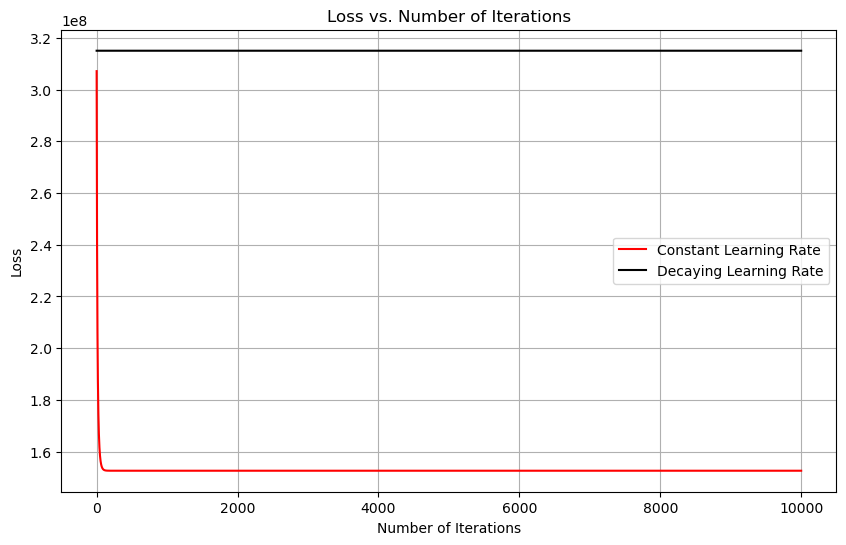

In [12]:
#•	Modify the code to implement the exponential decay method for the learning rate.

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming X_train, y_train are defined
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
m = X_train.shape[0]  # number of data points
n = X_train.shape[1]  # number of features

n_iterations = 10000  # Number of iterations
W2 = np.random.randn(n + 1,1)  # Weight matrix
alpha = 0.01                  # Learning rate

# Constants for exponential decay
decay_rate = 0.95
initial_learning_rate = 0.01

loss_constant_lr = []  # Loss value for constant learning rate
loss_decaying_lr = []  # Loss value for decaying learning rate

start_time2 = time.time()

for iteration in range(n_iterations):
    gradients = 1/m * X_b.T.dot(X_b.dot(W2) - y_train)
    W2 = W2 - alpha * gradients
    predictions = X_b.dot(W2)
    loss_constant_lr.append(mean_squared_error(y_train, predictions))
    
    # Exponential decay for learning rate
    alpha = initial_learning_rate * (decay_rate ** iteration)
    
    # Update weights with decaying learning rate
    W2 = W2 - alpha * gradients
    predictions = X_b.dot(W)
    loss_decaying_lr.append(mean_squared_error(y_train, predictions))
    
end_time2 = time.time()

comp_time2= end_time2 - start_time2

print("Coefficients and intercept of the model with decay method:")
print(W2)

print("Time taken for computation is: ",comp_time1)



#•	Plot the loss values as a function of the number of iterations for the constant and decaying learning rates.

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), loss_constant_lr, label='Constant Learning Rate',color='Red')
plt.plot(range(n_iterations), loss_decaying_lr, label='Decaying Learning Rate',color ='black')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Number of Iterations')
plt.legend()
plt.grid(True)
plt.show()

# Constant Learning Rate
The learning rate (α) is fixed during the training procedure in constant learning rate optimisation. The amount of the step made in each iteration towards the cost function's minimum is determined by the learning rate. The algorithm may take a long time to converge if the learning rate is too modest, and it may overshoot the minimum or even diverge if it is too great.

# Decaying Learning Rate
The learning rate falls with time in decaying learning rate optimisation. Larger steps at the start of training, which helps speed up convergence, and smaller steps as the optimisation process gets closer to convergence, which helps fine-tune the parameters, are made possible by this method. The learning rate can be decreased using a variety of techniques, including adaptive techniques like Adam, step decay, and exponential decay.

### Comparison
Constant Learning Rate: 
  - Pros: Simple to implement, stable if the learning rate is well-tuned.
  - Cons: Prone to convergence issues if the learning rate is poorly chosen. May take longer to converge if the learning rate is too small.

Decaying Learning Rate
  - Pros: Faster convergence in the initial stages, more stable and fine-tuned adjustments in later stages.
  - Cons: Requires tuning hyperparameters related to decay rate or schedule.


For our insurance dataset the constant learning performs well as the dataset size is very small, so there is no need for the decay leanring rate method as it may require more epochs or iterations to make the model converge which increases the compuatation time. For the larger datasets, the decay leanring method is very useful to make the model converge.

# 4.	Model Evaluation:
•	Predict the expenses for the testing dataset using the trained model.
•	Compute the Mean Absolute Error (MAE) and Mean Squared Error (MSE) of the predictions.
•	Plot a histogram of the error distribution.


In [13]:
# Predict expenses for the testing dataset

def predict(W):
    X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
    predictions_test = X_test_b.dot(W)
    return predictions_test

def error_calculation(predictions_test,y_test):
    # Compute Mean Absolute Error (MAE) and Mean Squared Error (MSE)
    MAE = np.mean(np.abs(predictions_test - y_test))
    MSE = np.mean((predictions_test - y_test)**2)
    
    return MAE ,MSE

def histogramPlot(predictions_test,y_test):
    # Plot histogram of error distribution
    error = predictions_test - y_test
    plt.figure(figsize=(10, 6))
    plt.hist(error, bins=50, edgecolor='k')
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.title('Error Distribution')
    plt.grid(True)
    plt.show()


Model 1 without decay method
Mean Absolute Error (MAE): 4530.195673293092
Mean Squared Error (MSE): 43026753.78030937


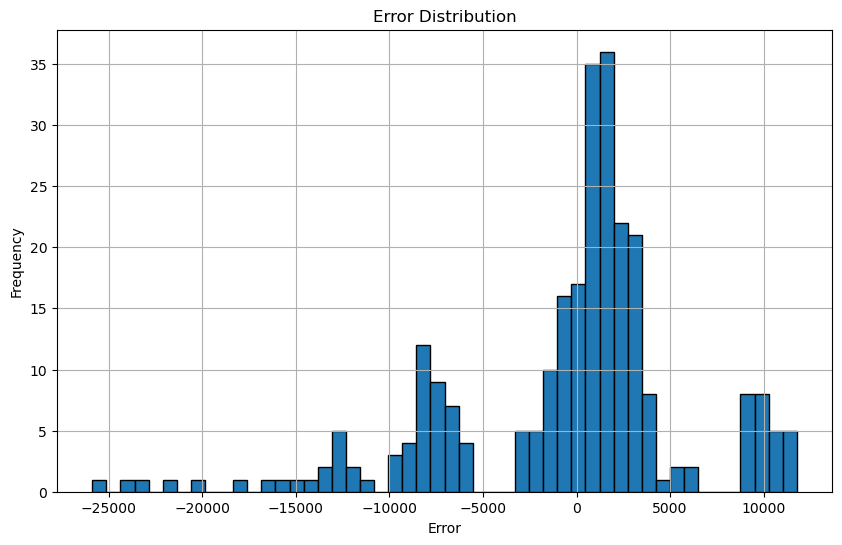

In [14]:
predictions_test1 = predict(W1)

a,b = error_calculation(predictions_test1,y_test)

print("Model 1 without decay method")
print("Mean Absolute Error (MAE):", a)
print("Mean Squared Error (MSE):", b)


# Plot histogram of error distribution
histogramPlot(predictions_test1,y_test)

Model 1 without decay method
Mean Absolute Error (MAE): 8494.007323722097
Mean Squared Error (MSE): 176915510.51186243


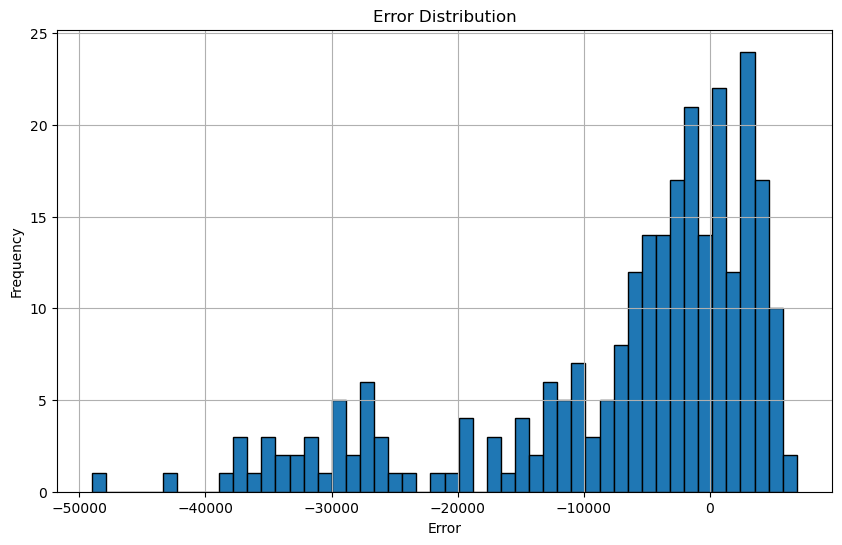

In [15]:
# Predict expenses for the testing dataset with decay method model (Model 2)
predictions_test2 = predict(W2)

x,y = error_calculation(predictions_test2,y_test)

print("Model 1 without decay method")
print("Mean Absolute Error (MAE):", x)
print("Mean Squared Error (MSE):", y)


# Plot histogram of error distribution
histogramPlot(predictions_test2,y_test)


# 5.	Learning Rate Analysis:
•	Demonstrate the effect of varying the learning rate on the convergence of the gradient descent algorithm.


In [16]:
#Model 3 with learning rate of 0.05

# Model 3

X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
m = X_train.shape[0]  # number of data points
n = X_train.shape[0]   # number of features


alpha = 0.05                  # Learning rate
n_iterations = 10000  # Number of iterations
W = np.random.randn(X_train.shape[1]+1,1)  # Weight matrix

#•	Show the coefficients and intercept of the model.

W3,loss,comp_time3 = gradient_decent(X_b,W,n_iterations,alpha)

print("Coefficients and intercept of the model with learning rate of 0.05 is:")
print(W3)

print("Time taken for computation is: ",comp_time3)



#Model Evaluation

predictions = predict(W3)

a,b = error_calculation(predictions,y_test)

print("Model 3 without decay method")
print("Mean Absolute Error (MAE):", a)
print("Mean Squared Error (MSE):", b)



Coefficients and intercept of the model with learning rate of 0.05 is:
[[-3076.4722638241956]
 [12527.905986183785]
 [236.7353119236315]
 [11296.536194572143]
 [3426.658518883289]
 [23897.545059791693]
 [-272.9678703086007]
 [-1242.8748577203612]
 [-1109.2227581405757]]
Time taken for computation is:  45.44641828536987
Model 3 without decay method
Mean Absolute Error (MAE): 4556.46110222282
Mean Squared Error (MSE): 42656110.33148337


In [17]:
#Model 4 with leanring rate of 0.1

# Model 4

X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
m = X_train.shape[0]  # number of data points
n = X_train.shape[0]   # number of features


alpha = 0.1                 # Learning rate
n_iterations = 10000  # Number of iterations
W = np.random.randn(X_train.shape[1]+1,1)  # Weight matrix

#•	Show the coefficients and intercept of the model.

W4,loss,comp_time4 = gradient_decent(X_b,W,n_iterations,alpha)

print("Coefficients and intercept of the model 4 with learning rate of 0.1 is:")
print(W4)

print("Time taken for computation is: ",comp_time4)



#Model Evaluation

predictions = predict(W4)

a,b = error_calculation(predictions,y_test)

print("Model 3 without decay method")
print("Mean Absolute Error (MAE):", a)
print("Mean Squared Error (MSE):", b)


Coefficients and intercept of the model 4 with learning rate of 0.1 is:
[[-4681.919367889514]
 [12525.920563992942]
 [241.9741464795871]
 [11289.117861698292]
 [6708.744583280614]
 [23891.48170486138]
 [-272.4737725259771]
 [-1238.4121042759268]
 [-1108.5956420666557]]
Time taken for computation is:  46.00970983505249
Model 3 without decay method
Mean Absolute Error (MAE): 4560.614057266782
Mean Squared Error (MSE): 42677981.05944344


In [18]:
#Model 5 with learning rate of 0.05

# Model 5

X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
m = X_train.shape[0]  # number of data points
n = X_train.shape[0]   # number of features


alpha = 0.5                 # Learning rate
n_iterations = 10000  # Number of iterations
W = np.random.randn(X_train.shape[1]+1,1)  # Weight matrix

#•	Show the coefficients and intercept of the model.

W5,loss,comp_time5 = gradient_decent(X_b,W,n_iterations,alpha)

print("Coefficients and intercept of the model with learning rate of 0.5 is:")
print(W5)

print("Time taken for computation is: ",comp_time5)



#Model Evaluation

predictions = predict(W3)

a,b = error_calculation(predictions,y_test)

print("Model 5 without decay method")
print("Mean Absolute Error (MAE):", a)
print("Mean Squared Error (MSE):", b)


Coefficients and intercept of the model with learning rate of 0.5 is:
[[-10974.76327261381]
 [12518.153815213682]
 [262.49310886080207]
 [11259.336813677153]
 [19574.006095852303]
 [23867.700116336622]
 [-270.5371395834187]
 [-1220.8380943219533]
 [-1106.1081996049643]]
Time taken for computation is:  45.343332290649414
Model 5 without decay method
Mean Absolute Error (MAE): 4556.46110222282
Mean Squared Error (MSE): 42656110.33148337


# 6.	Scikit-learn Implementation:
•	Repeat the regression using the linear_model.LinearRegression class from scikit-learn.
•	Compute MAE and MSE for comparison.


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error



# Create an instance of Linear Regression model
model = LinearRegression()

start_time3 = time.time()
# Train the model
model.fit(X_train, y_train)

end_time3 = time.time()

comp_time3 =end_time3 - start_time3

print("Coefficients and intercept of the model with Linear Regression class from sckit learn library:")

# Print coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

print("Time taken for computation is: ",comp_time3)



Coefficients and intercept of the model with Linear Regression class from sckit learn library:
Coefficients: [[12515.64788316   269.11352718 11249.72799369 23724.96712688
  23860.02701561  -269.91228731 -1215.16786121 -1105.30562927]]
Intercept: [-13005.14172958]
Time taken for computation is:  0.011942863464355469


Mean Absolute Error (MAE): 4587.184232769768
Mean Squared Error (MSE): 43164058.668889396


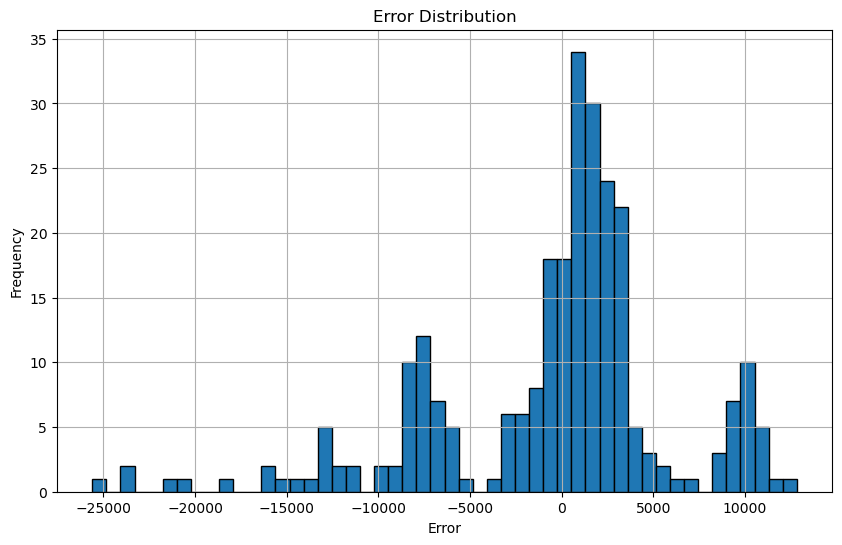

In [21]:

# Predict expenses for the testing dataset
predictions_test = model.predict(X_test)

# Compute Mean Absolute Error (MAE) and Mean Squared Error (MSE)
MAE = mean_absolute_error(y_test, predictions_test)
MSE = mean_squared_error(y_test, predictions_test)

print("Mean Absolute Error (MAE):", MAE)
print("Mean Squared Error (MSE):", MSE)

# Plot histogram of error distribution
error = predictions_test - y_test
plt.figure(figsize=(10, 6))
plt.hist(error, bins=50, edgecolor='k')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Distribution')
plt.grid(True)
plt.show()



# 7.	Normal Equation Implementation:
•	Use the normal equation method to find the regression line directly.
•	Compare the MAE and MSE with previous methods


In [25]:
# Add bias term to feature matrix X_train
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train].astype(np.float64)
y_train = y_train.astype(np.float64)

st_time = time.time()

# Compute the parameters using the normal equation
W_normal = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

ed_time = time.time()

comp_time_normal = ed_time - st_time


# Extract the intercept and coefficients
intercept = W_normal[0]
coefficients = W_normal[1:]

print("Intercept:", intercept)
print("Coefficients:", coefficients)

print("Computational time with Normal equation implementation is: ", comp_time_normal)


Intercept: [-13005.14172959]
Coefficients: [[12515.64788316]
 [  269.11352718]
 [11249.72799369]
 [23724.96712689]
 [23860.02701561]
 [ -269.91228731]
 [-1215.16786121]
 [-1105.30562927]]
Computational time with Normal equation implementation is:  0.0022149085998535156


Mean Absolute Error (MAE): 4587.184232769662
Mean Squared Error (MSE): 43164058.66889046


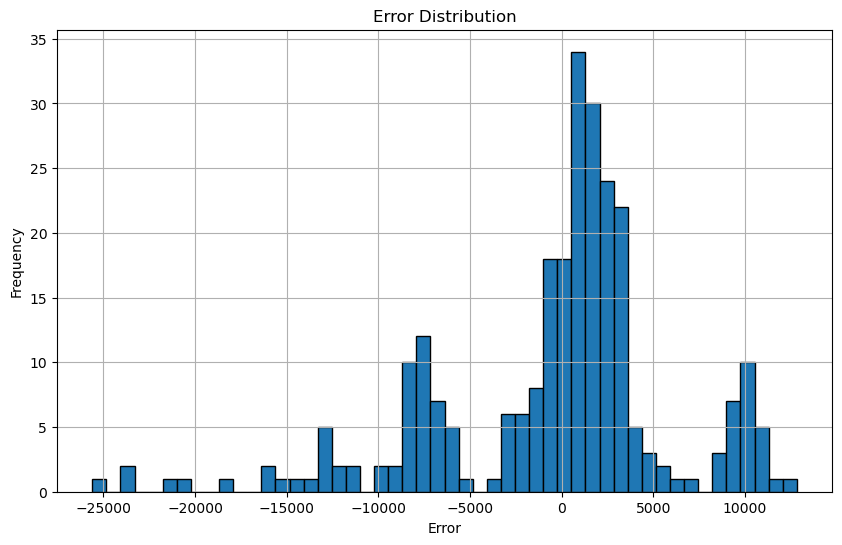

In [26]:
# Predict expenses for the testing dataset
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
predictions_test = X_test_b.dot(W_normal)


# Compute Mean Absolute Error (MAE) and Mean Squared Error (MSE)
MAE = np.mean(np.abs(predictions_test - y_test))
MSE = np.mean((predictions_test - y_test)**2)


print("Mean Absolute Error (MAE):", MAE)
print("Mean Squared Error (MSE):", MSE)


# Plot histogram of error distribution
error = predictions_test - y_test
plt.figure(figsize=(10, 6))
plt.hist(error, bins=50, edgecolor='k')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Distribution')
plt.grid(True)
plt.show()

# 8.	Comparison:
•	Compare the three solutions in terms of MAE, MSE, and computational efficiency.

Model 1:

Time taken for computation is:  37.96727252006531
Model 1 without decay method
Mean Absolute Error (MAE): 4530.195673293092
Mean Squared Error (MSE): 43026753.78030937

Model 2: Using Sckit learn library

Time taken for computation is:  0.011942863464355469

Mean Absolute Error (MAE): 4587.184232769768
Mean Squared Error (MSE): 43164058.668889396

Model 3: Using the Normal Equation method 

Mean Absolute Error (MAE): 4587.184232769662
Mean Squared Error (MSE): 43164058.66889046
Computational time with Normal equation implementation is:  0.0022149085998535156

From the three models, we can observe that the MAE, MSE are less for the Model 1 whereas the computation time is very high which is around 37 seconds, but this is not much efficient as compared to the other two models as it requires more time for calculation and also the error is slight less as compared other methods.

The model implemented with the normal equation took very less time compared toother two methods and the MSE and MAE obatained by it are almost equal to the model 2.

So for the small datasets which require less compuataions we can use both the Normal equation method and Sckit learn library method which takes less time for computation and gives better accuracy.We can also use the model 1 approach if we high speed computation machines which may aslo provide better accracy on validation 

